In [1]:
# %tensorflow_version 2.x
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [2]:
! pip install visualkeras


# 1. Import Thư Viện

In [3]:
! pip install tensorflow


In [4]:
import os
import pathlib
import numpy as np
import pandas as pd
from numpy.random import seed
import random
import time

# Loading libraries for visualization
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import visualkeras
from mpl_toolkits.mplot3d import Axes3D

# Loading libraries to read images
from PIL import Image
from skimage.io import imread
import cv2

# Loading keras for CNN
from tensorflow import keras
from keras import layers
from keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D, Input

# Loading necessary libraries from sklearns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

# 2. Load Dữ Liệu

In [5]:
seed(111)

In [6]:
df_path = './Data'
train_path = './Data/Train'
df_train = pd.read_csv('./Data/Train.csv')
df_test = pd.read_csv('./Data/Test.csv')
df_meta = pd.read_csv('./Data/Meta.csv')

### 2.1 Load labels

In [7]:
classNames = { 0: 'Giới hạn tốc độ (20km/h)',
            1: 'Giới hạn tốc độ (30km/h)',
            2: 'Giới hạn tốc độ (50km/h)',
            3: 'Giới hạn tốc độ (60km/h)',
            4: 'Giới hạn tốc độ (70km/h)',
            5: 'Giới hạn tốc độ (80km/h)',
            6: 'Hết giới hạn tốc độ (80km/h)',
            7: 'Giới hạn tốc độ (100km/h)',
            8: 'Giới hạn tốc độ (120km/h)',
            9: 'Cấm vượt',
            10: 'Cấm xe trên 3.5 tấn vượt',
            11: 'Được ưu tiên tại ngã tư tiếp theo',
            12: 'Đường ưu tiên',
            13: 'Nhường đường',
            14: 'Dừng lại',
            15: 'Cấm xe',
            16: 'Cấm xe trên 3.5 tấn',
            17: 'Cấm vào',
            18: 'Chú ý chung',
            19: 'Khúc cua nguy hiểm bên trái',
            20: 'Khúc cua nguy hiểm bên phải',
            21: 'Liên tiếp nhiều khúc cua',
            22: 'Đường gồ ghề',
            23: 'Đường trơn trượt',
            24: 'Đường hẹp bên phải',
            25: 'Đang thi công đường',
            26: 'Tín hiệu giao thông',
            27: 'Người đi bộ',
            28: 'Trẻ em qua đường',
            29: 'Xe đạp qua đường',
            30: 'Cẩn thận băng/tuyết',
            31: 'Động vật hoang dã băng qua',
            32: 'Hết tất cả giới hạn tốc độ và cấm vượt',
            33: 'Rẽ phải phía trước',
            34: 'Rẽ trái phía trước',
            35: 'Chỉ được đi thẳng',
            36: 'Đi thẳng hoặc rẽ phải',
            37: 'Đi thẳng hoặc rẽ trái',
            38: 'Đi về bên phải',
            39: 'Đi về bên trái',
            40: 'Bắt buộc đi theo vòng xuyến',
            41: 'Hết cấm vượt',
            42: 'Hết cấm vượt với xe trên 3.5 tấn'}

In [8]:
descriptions = {
    0: "Biển báo giới hạn tốc độ tối đa là 20km/h. Người điều khiển phương tiện không được vượt quá tốc độ này.",
    1: "Biển báo giới hạn tốc độ tối đa là 30km/h. Thường xuất hiện trong khu vực đông dân cư, trường học.",
    2: "Biển báo giới hạn tốc độ tối đa là 50km/h. Thường thấy trên các tuyến đường nội thành.",
    3: "Biển báo giới hạn tốc độ tối đa là 60km/h. Áp dụng cho các đoạn đường đủ an toàn cho tốc độ trung bình.",
    4: "Biển báo giới hạn tốc độ tối đa là 70km/h. Thường xuất hiện ở khu vực ngoại ô, ít phương tiện qua lại.",
    5: "Biển báo giới hạn tốc độ tối đa là 80km/h. Phù hợp cho các tuyến đường quốc lộ, liên tỉnh.",
    6: "Biển báo hết hiệu lực giới hạn tốc độ 80km/h. Phương tiện được phép chạy tốc độ cao hơn nếu điều kiện cho phép.",
    7: "Biển báo giới hạn tốc độ tối đa là 100km/h. Áp dụng cho các tuyến cao tốc hoặc đường lớn.",
    8: "Biển báo giới hạn tốc độ tối đa là 120km/h. Thường chỉ áp dụng tại một số tuyến cao tốc đặc biệt.",
    9: "Biển báo cấm vượt. Cấm các phương tiện vượt nhau trong đoạn đường này.",
    10: "Biển báo cấm xe có trọng lượng lớn hơn 3.5 tấn vượt xe khác.",
    11: "Biển báo xe được ưu tiên đi qua ngã tư kế tiếp.",
    12: "Biển báo đường ưu tiên. Phương tiện đi trên đường này có quyền ưu tiên.",
    13: "Biển báo nhường đường. Phương tiện phải nhường cho xe khác đi trước.",
    14: "Biển báo dừng lại. Phương tiện phải dừng hẳn trước khi tiếp tục di chuyển.",
    15: "Biển báo cấm xe cơ giới đi vào.",
    16: "Biển báo cấm xe có trọng tải trên 3.5 tấn đi vào.",
    17: "Biển báo cấm tất cả các loại phương tiện đi vào.",
    18: "Biển cảnh báo nguy hiểm chung. Người lái xe cần thận trọng.",
    19: "Biển báo khúc cua nguy hiểm phía bên trái.",
    20: "Biển báo khúc cua nguy hiểm phía bên phải.",
    21: "Biển báo nhiều khúc cua liên tiếp. Thường xuất hiện trên đèo, dốc.",
    22: "Biển báo đường gồ ghề, mặt đường không bằng phẳng.",
    23: "Biển báo đường trơn trượt. Cần giảm tốc và lái cẩn thận.",
    24: "Biển báo đường bị hẹp về phía bên phải.",
    25: "Biển báo khu vực đang thi công, sửa chữa đường.",
    26: "Biển báo có tín hiệu giao thông (đèn đỏ, xanh, vàng) phía trước.",
    27: "Biển báo khu vực người đi bộ băng qua đường.",
    28: "Biển báo khu vực có trẻ em băng qua đường. Thường gần trường học.",
    29: "Biển báo khu vực xe đạp băng qua.",
    30: "Biển cảnh báo khu vực có thể có băng hoặc tuyết. Cần lái xe cẩn thận.",
    31: "Biển cảnh báo có động vật hoang dã băng qua đường.",
    32: "Biển báo hết tất cả các giới hạn về tốc độ và cấm vượt trước đó.",
    33: "Biển báo bắt buộc rẽ phải phía trước.",
    34: "Biển báo bắt buộc rẽ trái phía trước.",
    35: "Biển báo chỉ được phép đi thẳng.",
    36: "Biển báo được phép đi thẳng hoặc rẽ phải.",
    37: "Biển báo được phép đi thẳng hoặc rẽ trái.",
    38: "Biển báo yêu cầu phương tiện chỉ được đi về bên phải.",
    39: "Biển báo yêu cầu phương tiện chỉ được đi về bên trái.",
    40: "Biển báo bắt buộc đi theo vòng xuyến phía trước.",
    41: "Biển báo hết hiệu lực cấm vượt.",
    42: "Biển báo hết hiệu lực cấm vượt với xe trên 3.5 tấn."
}

In [9]:
penalties = {
    0: "Phạt tiền từ 800.000đ đến 1.000.000đ nếu vượt quá tốc độ tối đa từ 5 đến dưới 10 km/h.",
    1: "Phạt từ 800.000đ đến 1.000.000đ nếu vượt tốc độ cho phép.",
    2: "Phạt từ 800.000đ đến 1.000.000đ nếu vượt tốc độ cho phép.",
    3: "Phạt từ 800.000đ đến 1.000.000đ nếu vượt tốc độ cho phép.",
    4: "Phạt từ 800.000đ đến 1.000.000đ nếu vượt tốc độ cho phép.",
    5: "Phạt từ 800.000đ đến 1.000.000đ nếu vượt tốc độ cho phép.",
    6: "Không áp dụng xử phạt (biển báo đã hết hiệu lực).",
    7: "Phạt từ 3.000.000đ đến 5.000.000đ nếu vượt quá tốc độ trên 20 km/h.",
    8: "Phạt từ 4.000.000đ đến 6.000.000đ nếu vượt quá tốc độ quy định.",
    9: "Phạt từ 4.000.000đ đến 5.000.000đ nếu vượt trong khu vực cấm vượt.",
    10: "Phạt đến 6.000.000đ nếu xe tải vượt sai quy định.",
    11: "Không tuân theo biển: Cảnh cáo hoặc phạt đến 500.000đ.",
    12: "Không tuân theo biển báo đường ưu tiên: Phạt từ 200.000đ đến 400.000đ.",
    13: "Không nhường đường: Phạt từ 400.000đ đến 600.000đ.",
    14: "Không dừng đúng quy định: Phạt từ 2.000.000đ đến 3.000.000đ.",
    15: "Đi vào đường cấm: Phạt từ 3.000.000đ đến 5.000.000đ.",
    16: "Đi vào đường cấm đối với xe tải: Phạt từ 4.000.000đ đến 6.000.000đ.",
    17: "Cấm vào, vẫn đi: Phạt từ 3.000.000đ đến 5.000.000đ.",
    18: "Không giảm tốc trong khu vực nguy hiểm: Cảnh cáo hoặc phạt đến 500.000đ.",
    19: "Không giảm tốc độ tại khúc cua: Phạt từ 200.000đ đến 400.000đ.",
    20: "Không giảm tốc độ tại khúc cua: Phạt từ 200.000đ đến 400.000đ.",
    21: "Không đảm bảo an toàn tại đoạn đường cong: Phạt từ 400.000đ đến 600.000đ.",
    22: "Đi nhanh tại đoạn đường gồ ghề: Phạt từ 400.000đ đến 600.000đ.",
    23: "Không giảm tốc độ trên đường trơn trượt: Phạt từ 400.000đ đến 600.000đ.",
    24: "Không nhường đường tại đoạn đường hẹp: Phạt đến 600.000đ.",
    25: "Không tuân thủ biển thi công: Phạt từ 500.000đ đến 1.000.000đ.",
    26: "Không chấp hành tín hiệu đèn: Phạt từ 4.000.000đ đến 6.000.000đ.",
    27: "Không nhường đường cho người đi bộ: Phạt từ 800.000đ đến 1.000.000đ.",
    28: "Không giảm tốc khi có trẻ em qua đường: Phạt từ 1.000.000đ đến 2.000.000đ.",
    29: "Không giảm tốc cho xe đạp qua đường: Phạt từ 400.000đ đến 600.000đ.",
    30: "Không đảm bảo an toàn khi trời lạnh/băng tuyết: Cảnh cáo.",
    31: "Không giảm tốc khi có động vật hoang dã: Phạt từ 200.000đ.",
    32: "Không áp dụng xử phạt (biển báo hết hiệu lực).",
    33: "Không rẽ theo biển báo: Phạt từ 800.000đ đến 1.000.000đ.",
    34: "Không rẽ theo biển báo: Phạt từ 800.000đ đến 1.000.000đ.",
    35: "Không đi đúng hướng: Phạt từ 800.000đ đến 1.000.000đ.",
    36: "Không đi đúng làn, đúng hướng: Phạt từ 800.000đ đến 1.000.000đ.",
    37: "Không đi đúng làn, đúng hướng: Phạt từ 800.000đ đến 1.000.000đ.",
    38: "Không đi đúng hướng bắt buộc: Phạt từ 800.000đ đến 1.000.000đ.",
    39: "Không đi đúng hướng bắt buộc: Phạt từ 800.000đ đến 1.000.000đ.",
    40: "Không tuân thủ vòng xuyến: Phạt từ 400.000đ đến 600.000đ.",
    41: "Không áp dụng xử phạt (biển hết hiệu lực).",
    42: "Không áp dụng xử phạt (biển hết hiệu lực)."
}

### 2.2 Load data train

In [10]:
data_list = []
lables_list = []
classes_list = 43
for i in range (classes_list):
    i_path = os.path.join(train_path, str(i)) #0-42
    for img in os.listdir(i_path):
      try:
        im = Image.open(i_path + '/' + img)
        im = im.resize((32, 32))
        im = np.array(im)
        data_list.append(im)
        lables_list.append(i)
      except:
        print("Error loading image")
data = np.array(data_list)
lables = np.array(lables_list)

In [11]:
print(data.shape, lables.shape)


(39209, 32, 32, 3) (39209,)


In [12]:
data[1].shape # xem kích thước một ảnh, 32,32 : chiều dài chiều rộng ảnh, 3: 3 chanel khi scale lại sẽ là hình màu xám -> 1 

(32, 32, 3)

In [13]:
data[1] # thông số điểm ảnh của một ảnh trong ma trận 32x32;
        # Mỗi điểm ảnh tương ứng với 3 mã màu trong rbg(x,x1,x2)

array([[[ 69,  73,  73],
        [ 76,  79,  79],
        [ 75,  77,  77],
        ...,
        [ 75,  80,  79],
        [ 70,  76,  76],
        [ 66,  68,  70]],

       [[ 65,  69,  69],
        [ 73,  75,  75],
        [ 82,  83,  82],
        ...,
        [ 86,  82,  86],
        [ 73,  78,  83],
        [ 67,  69,  73]],

       [[ 63,  68,  68],
        [ 70,  71,  72],
        [ 79,  79,  77],
        ...,
        [ 98,  84,  89],
        [ 70,  75,  76],
        [ 68,  71,  70]],

       ...,

       [[156, 135, 139],
        [152, 136, 143],
        [147, 135, 140],
        ...,
        [ 77,  78,  80],
        [ 80,  83,  78],
        [ 93,  96,  85]],

       [[ 98, 100, 101],
        [100,  99, 101],
        [ 99,  96, 101],
        ...,
        [ 82,  83,  84],
        [ 94,  97,  93],
        [106, 110, 101]],

       [[ 72,  74,  74],
        [ 81,  82,  81],
        [ 92,  92,  97],
        ...,
        [ 78,  78,  78],
        [104, 104, 101],
        [101, 104,  96]]

Shuffle data train

In [14]:
X_train, Y_train = shuffle(data, lables) #Giúp máy học trans modle tốt hơn. 
                                         #Trộn từng dòng (dòng gồm ảnh, nhãn của ảnh)

In [15]:
print("Train dataset: ", X_train.shape, Y_train.shape)

Train dataset:  (39209, 32, 32, 3) (39209,)


### 2.3 Load data test

In [16]:
Y_test = df_test["ClassId"].values

In [17]:
Y_test

array([16,  1, 38, ...,  6,  7, 10])

In [18]:
test_images = df_test["Path"].values
data = []
for img in test_images:
    im = Image.open(df_path + '/' + img)
    im = im.resize((32, 32))
    im = np.array(im)
    data.append(im)
X_test = np.array(data)  


In [19]:
print("Test dataset", X_test.shape, Y_test.shape)

Test dataset (12630, 32, 32, 3) (12630,)


# 3. Data Description - Mô Tả Dữ Liệu

In [20]:
df_train.describe() #Mô tả bộ dữ liệu

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000
mean,50.835880,50.328930,5.999515,5.962381,45.197302,44.728379,15.788390
std,24.306933,23.115423,1.475493,1.385440,23.060157,21.971145,12.013238
min,25.000000,25.000000,0.000000,5.000000,20.000000,20.000000,0.000000
25%,35.000000,35.000000,5.000000,5.000000,29.000000,30.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,58.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,243.000000,225.000000,20.000000,20.000000,223.000000,205.000000,42.000000


In [21]:
df_train.info() # xem thông tin bộ dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


In [22]:
df_train.isnull().sum() # Kiểm tra xem có thành phần không có giá trị (null) không

Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64

# 4. Data Visualization - Trực Quan Hóa Dữ Liệu

Dataset

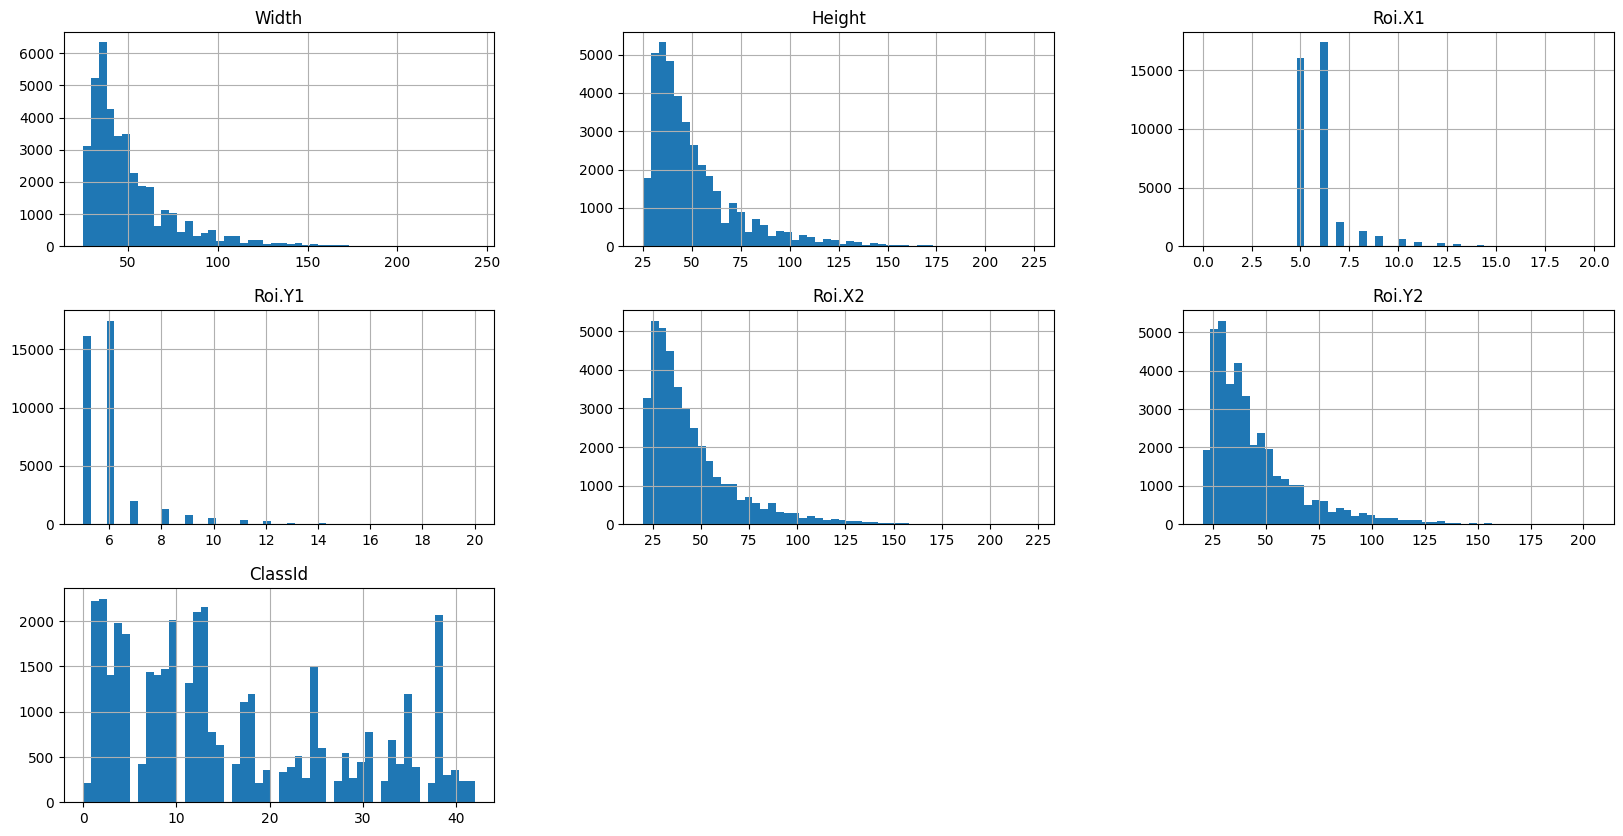

In [23]:
df_train.hist(bins=50, figsize=(20,10))
plt.show()

Number of images in each ClassId

<Axes: xlabel='ClassId', ylabel='count'>

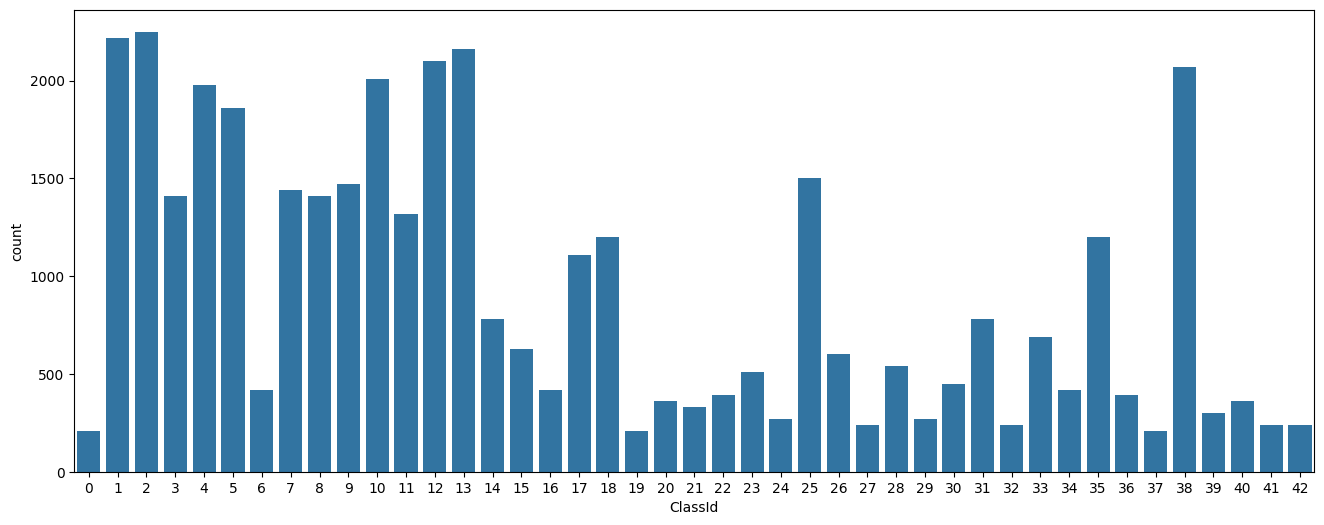

In [24]:
# đếm số lượng hình ảnh thuộc 42 nhãn  
plt.figure(figsize=(16,6)) 
sns.countplot(x = df_train['ClassId'])

Visualizing all the defferent signs in Meta

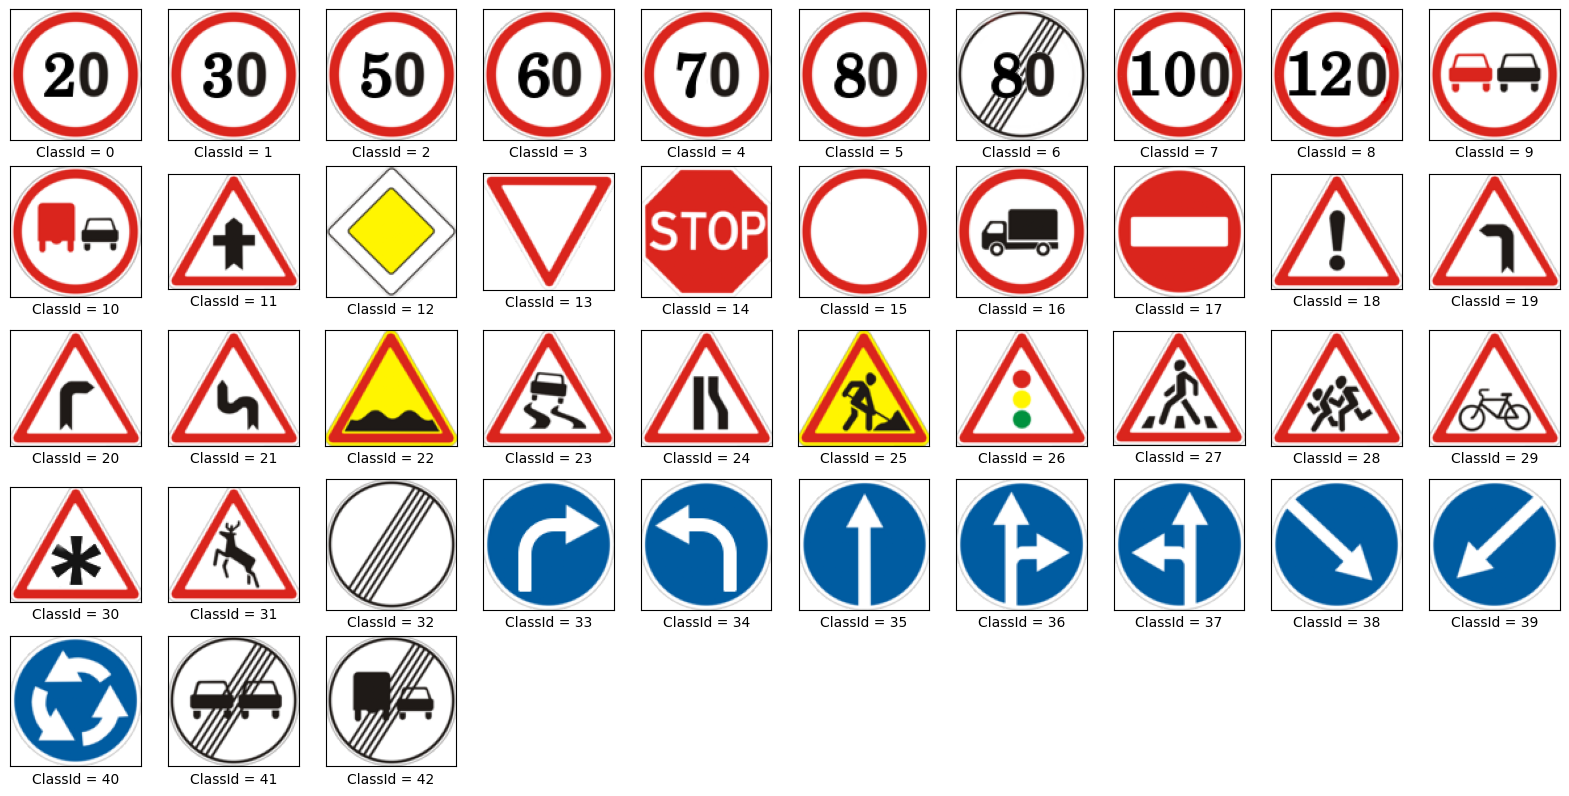

In [25]:
plt.figure(figsize=(20,20)) #chỉ ra sự khác nhau của bản mate và đời thực (train)
for i in range(0, 43):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    Path = df_path + '/Meta/{}.png'.format(i)
    img = plt.imread(Path)
    plt.xlabel('ClassId = {}'.format(i))
    plt.imshow(img)

Visualizing all the defferent signs in Train

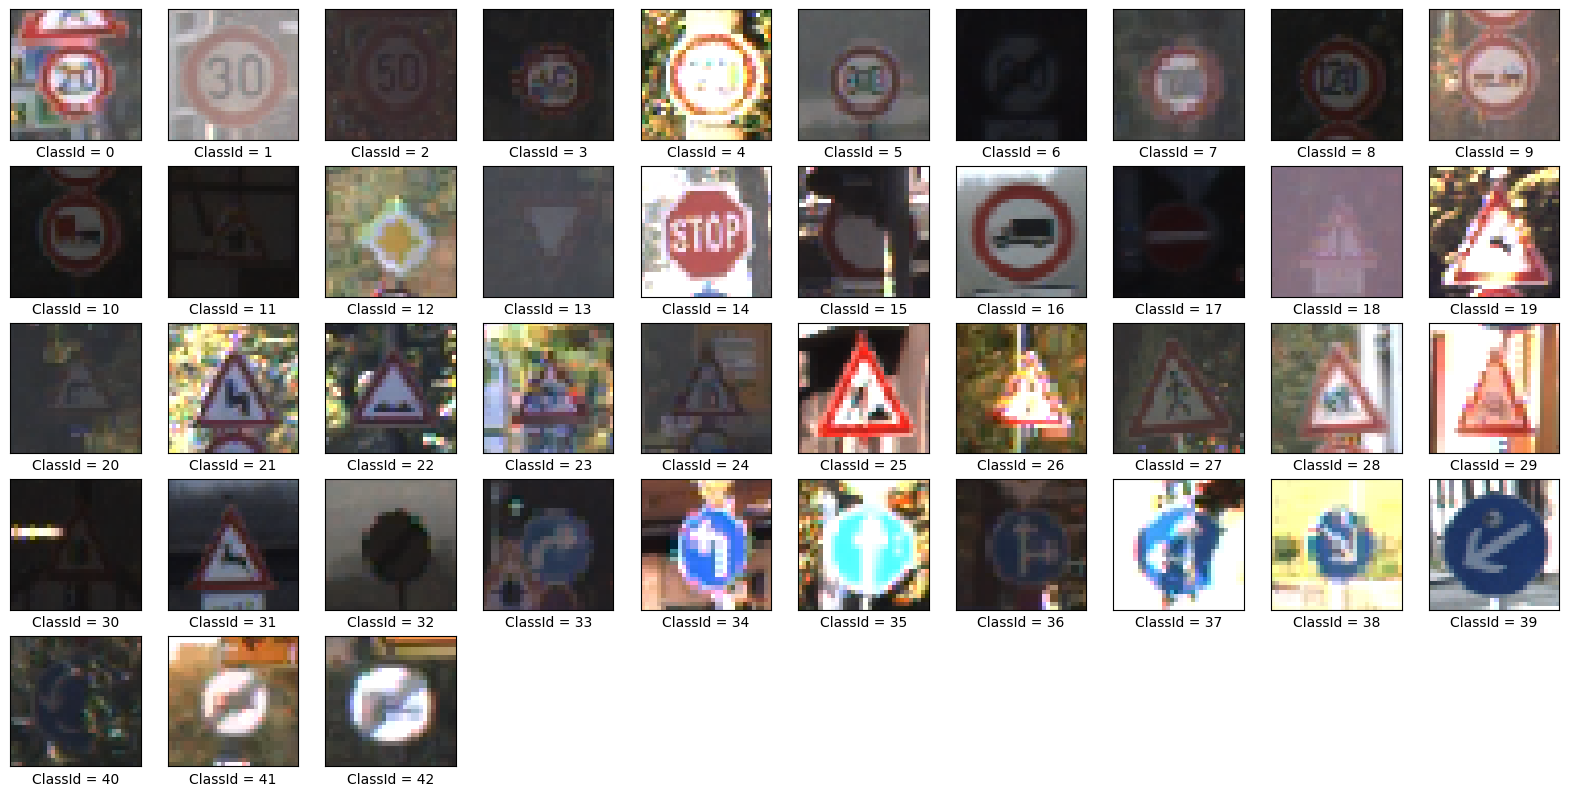

In [26]:
img_dir = pathlib.Path(train_path)
plt.figure(figsize=(20,20))
index = 0
for i in range(0, 43):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(32, 32))
    plt.xlabel('ClassId = {}'.format(i))
    plt.imshow(img)
plt.show()

# 5. Chuẩn Bị Dữ Liệu

In [27]:
# Creating copy of train and test set for cnn
# cần copy bộ dữ liệu ra để xử lí theo mỗi mô hình riêng, mà không ảnh hưởng tới bộ dữ liệu chính

X_train_knn = np.copy(X_train)
X_test_knn = np.copy(X_test)

X_train_cnn = np.copy(X_train)
X_test_cnn = np.copy(X_test)

X_train_svm = np.copy(X_train)
X_test_svm = np.copy(X_test)

X_train_rf = np.copy(X_train)
X_test_rf = np.copy(X_test)


In [28]:
#Dimensions of train and test data

print(X_train_knn.shape, Y_train.shape, X_test_knn.shape,Y_test.shape)
print(X_train_cnn.shape, Y_train.shape, X_test_cnn.shape,Y_test.shape) 
print(X_train_svm.shape, Y_train.shape, X_test_svm.shape,Y_test.shape)
print(X_train_rf.shape, Y_train.shape, X_test_rf.shape,Y_test.shape) 

(39209, 32, 32, 3) (39209,) (12630, 32, 32, 3) (12630,)
(39209, 32, 32, 3) (39209,) (12630, 32, 32, 3) (12630,)
(39209, 32, 32, 3) (39209,) (12630, 32, 32, 3) (12630,)
(39209, 32, 32, 3) (39209,) (12630, 32, 32, 3) (12630,)


In [29]:
# Resizing images to fit SVM and RF and KNN
#resize hình để phù hợp với svm và rf
X_train_knn.resize(39209, 32*32*3)
X_test_knn.resize(12630, 32*32*3)

X_train_svm.resize(39209, 32*32*3)
X_test_svm.resize(12630, 32*32*3)

X_train_rf.resize(39209, 32*32*3)
X_test_rf.resize(12630, 32*32*3)

In [30]:
# Normaliazing data for SVM and RF and KNN
# ** Hỏi lại: scale lại dữ liệu, chia nhỏ dữ liệu lại trong khoảng (-1,1) giúp xử lí dữ liệu nhanh hơn
X_train_knn = preprocessing.scale(X_train_knn)
X_test_knn = preprocessing.scale(X_test_knn)

X_train_svm = preprocessing.scale(X_train_svm)
X_test_svm = preprocessing.scale(X_test_svm)

X_train_rf = preprocessing.scale(X_train_rf)
X_test_rf = preprocessing.scale(X_test_rf)

In [31]:
# Spliting data for CNN and KNN
# chia dữ liệu thành 2 tệp train và test
# test_size = 0.2 => train: 80%, val 20%
# random_state = 42 => 42 lần random
X_train_cnn, X_val_cnn, Y_train_cnn, Y_val_cnn = train_test_split(X_train, Y_train, test_size=0.2, random_state = 42)
print(X_train_cnn.shape, X_val_cnn.shape, Y_train_cnn.shape, Y_val_cnn.shape)


(31367, 32, 32, 3) (7842, 32, 32, 3) (31367,) (7842,)


In [32]:
X_train_svm[1] # xem thử sau khi scale được gì

array([-1.02725644, -0.99950441, -0.94137782, ..., -0.8109229 ,
       -0.73981261, -0.66748856])

In [33]:
#Converting the class labels into categorical variables for CNN and KNN

Y_train_knn = to_categorical(Y_train, 43)
Y_test_knn = to_categorical(Y_test, 43)

Y_train_cnn = to_categorical(Y_train, 43)
Y_val_cnn = to_categorical(Y_val_cnn, 43) 

In [34]:
print(Y_test)

[16  1 38 ...  6  7 10]


# 6. Thực hiện các thuật toán

In [35]:
# Creating blank dataframe to store model scores
#Tạo khung dữ liệu trống để lưu trữ điểm số của mô hình
df_scores  = pd.DataFrame(columns = ['Model', 'Score', 'Value'])
df_model = pd.DataFrame(columns = ['Model','Accuracy (%)','Time (mins)'])

### 6.1 K-Nearest Neighbors (KNN)

In [36]:
tic = time.perf_counter() #tính thời gian?????

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_knn, Y_train_knn)

#svm_clf.fit(X_train_svm, Y_train) # QUAN TRỌNG
toc = time.perf_counter()
m_knn, s_knn = divmod((toc - tic), 60)
time_knn=float(str(str(int(m_knn))+"."+str(int(m_knn))))



In [37]:
Y_pred_knn = knn_clf.predict(X_test_knn)

In [38]:
Y_pred_knn

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
Y_test_knn

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
Y_pred_knn 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
Y_pred_knn = np.argmax(Y_pred_knn, axis = 1)

In [42]:
# Calculating recall, precision, f1 score and accuracy of KNN
#Tính toán thu hồi, độ chính xác, điểm f1 (nhiều cách khác nhau)=> độ chính xác của KNN
import sklearn.metrics as metrics
recall_knn = metrics.recall_score(Y_test, Y_pred_knn, average='macro')
df_scores.loc[len(df_scores)] = ["KNN", "Recall", recall_knn]

precision_knn = metrics.precision_score(Y_test, Y_pred_knn, average='macro')
df_scores.loc[len(df_scores)] = ["KNN", "Precision", precision_knn]

f1_knn = metrics.f1_score(Y_test, Y_pred_knn, average='macro')
df_scores.loc[len(df_scores)] = ["KNN", "F1", f1_knn]

acc_knn=metrics.accuracy_score(Y_test, Y_pred_knn)
df_scores.loc[len(df_scores)] = ["KNN", "Accuracy", acc_knn]

df_model.loc[len(df_model)] = ["KNN", acc_knn*100, time_knn]
acc_knn

0.3615993665874901

In [43]:
# Classification report for KNN
# in ra kết quả do độ chính xác của từng nhãn (0-42) theo nhiều phương pháp tính khác nhau
# Y_test so sánh với Y_pred: so sánh kết quả test với kết quả dự đoán
print("Classification report for KNN classifier {0}:\n{1}\n".format(knn_clf, metrics.classification_report(Y_test, Y_pred_knn)))

Classification report for KNN classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.02      0.63      0.03        60
           1       0.42      0.27      0.32       720
           2       0.34      0.21      0.26       750
           3       0.13      0.12      0.12       450
           4       0.38      0.29      0.33       660
           5       0.21      0.29      0.24       630
           6       0.53      0.33      0.41       150
           7       0.25      0.30      0.27       450
           8       0.31      0.28      0.29       450
           9       0.56      0.28      0.37       480
          10       0.60      0.57      0.59       660
          11       0.64      0.22      0.33       420
          12       0.75      0.52      0.62       690
          13       0.89      0.85      0.87       720
          14       0.95      0.28      0.43       270
          15       0.40      0.24      0.30       210
          16    

In [44]:
cm = tf.math.confusion_matrix(Y_test, Y_pred_knn)

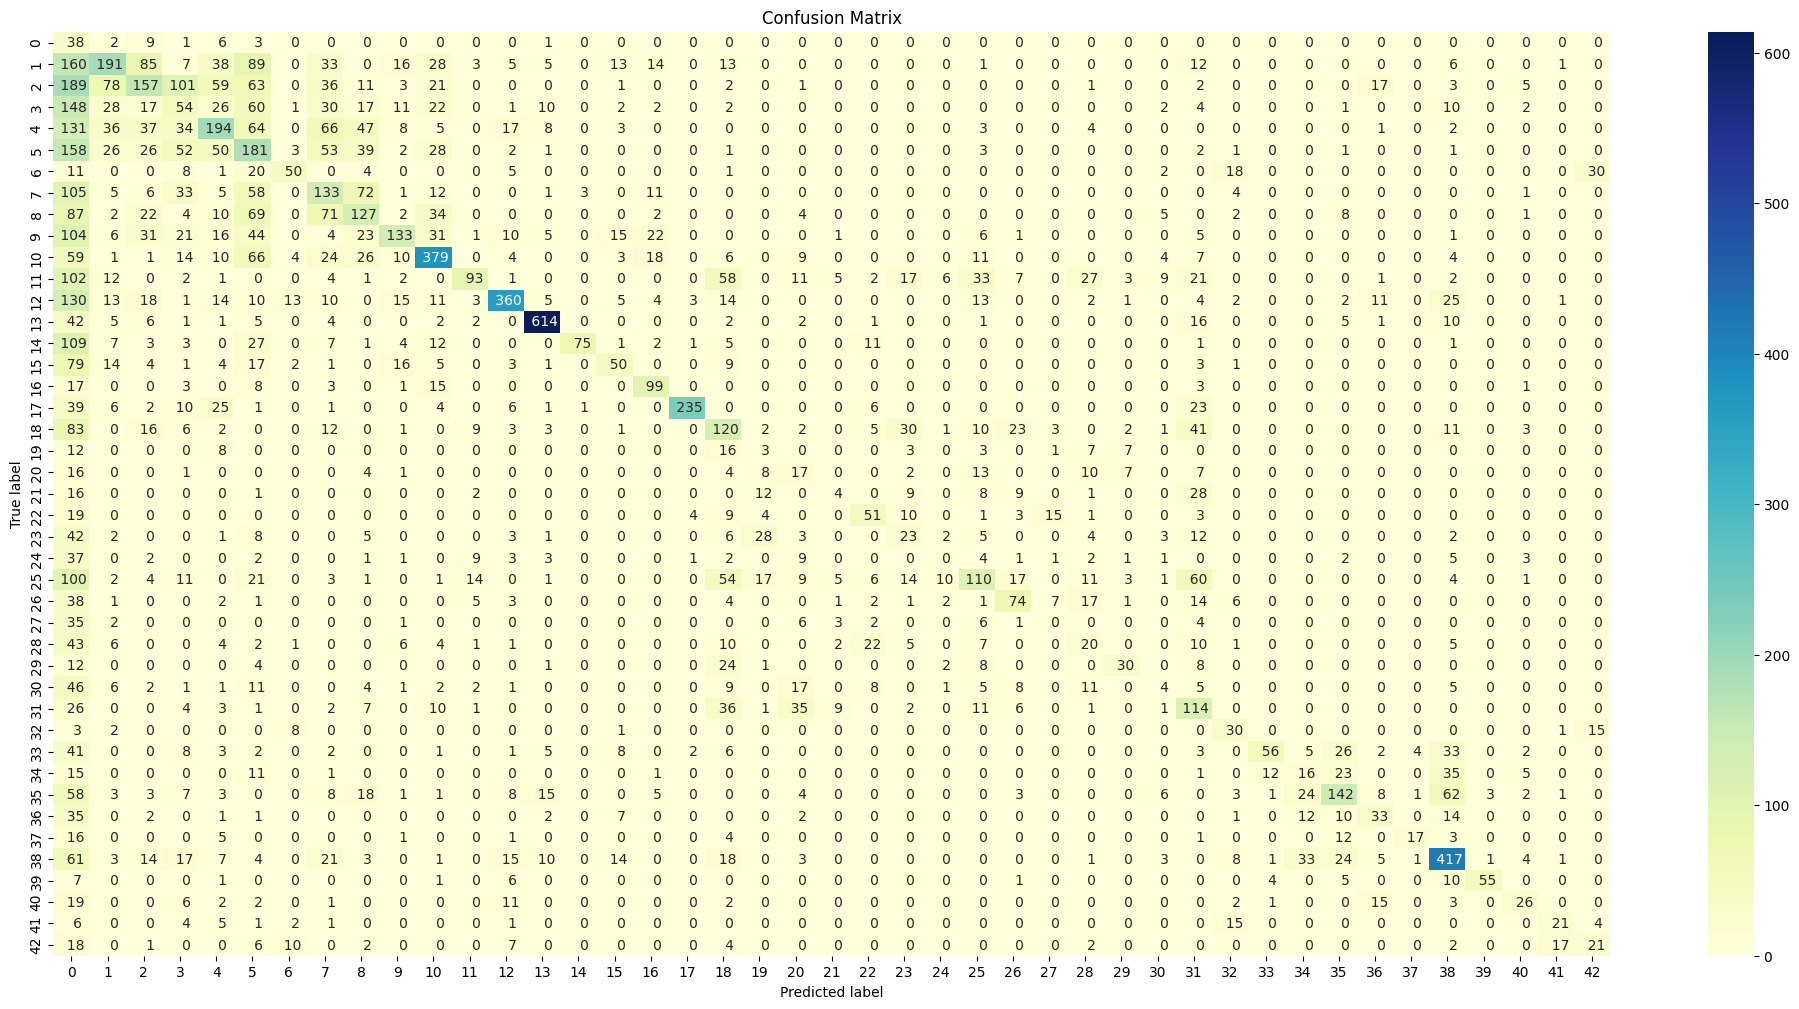

In [45]:
plt.figure(figsize = (20, 10))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='4g')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### 6.2 Support Vector Machine

In [46]:
# Defining SVM model
svm_clf = svm.NuSVC(nu=0.05,kernel='rbf',gamma=0.00001,random_state=121)

In [47]:
# Fitting SVM
# chạy modle
# SVM: train xong mới test sau đó mới dự đoán
# fit: cho dữ liệu vào modle xử lí => cho máy học
tic = time.perf_counter() #tính thời gian?????
svm_clf.fit(X_train_svm, Y_train) # QUAN TRỌNG
toc = time.perf_counter()
m_svm, s_svm = divmod((toc - tic), 60)
time_svm=float(str(str(int(m_svm))+"."+str(int(m_svm))))

In [48]:
# Predicting values for test data
# dự đoán kết quả của svm_clf khi đưa dữ liệu X_test_svm vào
Y_pred_svm = svm_clf.predict(X_test_svm)

In [49]:
Y_pred_svm.shape ## coi kết quả thử, kết quả dự đoán tên nhãn của từng ảnh trong test

(12630,)

In [50]:
# Calculating recall, precision, f1 score and accuracy of SVM
#Tính toán thu hồi, độ chính xác, điểm f1 (nhiều cách khác nhau)=> độ chính xác của SVM
import sklearn.metrics as metrics
recall_svm = metrics.recall_score(Y_test, Y_pred_svm, average='macro')
df_scores.loc[len(df_scores)] = ["SVM", "Recall", recall_svm]

precision_svm = metrics.precision_score(Y_test, Y_pred_svm, average='macro')
df_scores.loc[len(df_scores)] = ["SVM", "Precision", precision_svm]

f1_svm = metrics.f1_score(Y_test, Y_pred_svm, average='macro')
df_scores.loc[len(df_scores)] = ["SVM", "F1", f1_svm]

acc_svm=metrics.accuracy_score(Y_test, Y_pred_svm)
df_scores.loc[len(df_scores)] = ["SVM", "Accuracy", acc_svm]

df_model.loc[len(df_model)] = ["SVM", acc_svm*100, time_svm]
acc_svm

0.8311955661124307

In [51]:
# Classification report for SVM
# in ra kết quả do độ chính xác của từng nhãn (0-42) theo nhiều phương pháp tính khác nhau
# Y_test so sánh với Y_pred: so sánh kết quả test với kết quả dự đoán
print("Classification report for SVM classifier {0}:\n{1}\n".format(svm_clf, metrics.classification_report(Y_test, Y_pred_svm)))

Classification report for SVM classifier NuSVC(gamma=1e-05, nu=0.05, random_state=121):
              precision    recall  f1-score   support

           0       0.84      0.35      0.49        60
           1       0.74      0.91      0.82       720
           2       0.82      0.91      0.86       750
           3       0.69      0.81      0.75       450
           4       0.78      0.82      0.80       660
           5       0.77      0.85      0.81       630
           6       0.87      0.60      0.71       150
           7       0.91      0.76      0.83       450
           8       0.88      0.86      0.87       450
           9       0.92      0.84      0.88       480
          10       0.91      0.95      0.93       660
          11       0.85      0.91      0.88       420
          12       0.92      0.91      0.92       690
          13       0.97      0.98      0.97       720
          14       0.96      0.88      0.92       270
          15       0.87      0.81      0.84    

In [52]:
cm = tf.math.confusion_matrix(Y_test, Y_pred_svm)

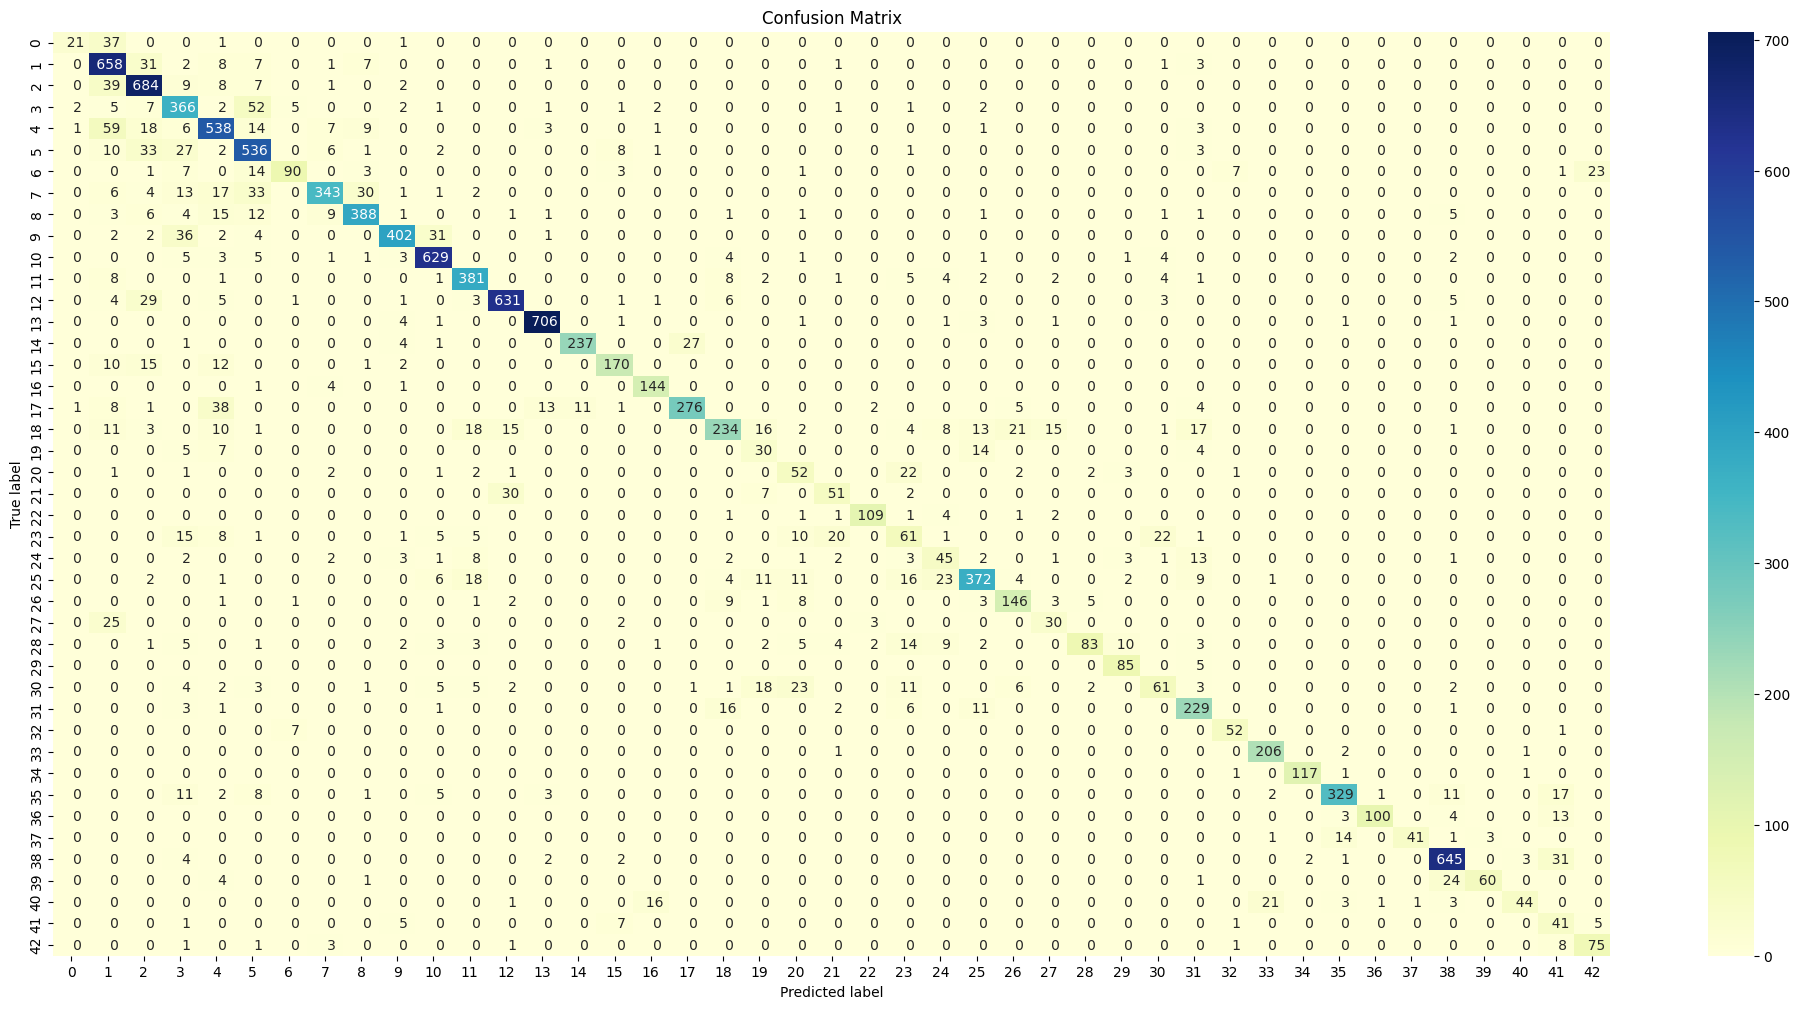

In [53]:
plt.figure(figsize = (20, 10))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='4g')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### 6.3 Random Forest (cây quyết định)


In [54]:
# Creating list of number of trees

tree_list = [50,100,200,300,500]

In [ ]:
Y_pred_list=[]
time_rf_list=[]
rf_accuracy=[]
for n in tree_list:
    
    # Defining RF model with 'n' trees
    rf_clf = RandomForestClassifier(n_estimators=n, random_state=121, criterion='entropy')
    tic = time.perf_counter()
    
    # Fitting RF
    rf_clf.fit(X_train_rf, Y_train)
    toc = time.perf_counter()
    
    # Predicting values for test data
    Y_pred_list.append(rf_clf.predict(X_test_rf))
    
    # Calculating time taken
    m_rf, s_rf = divmod((toc - tic), 60)
    time_rf_list.append(float(str(str(int(m_rf))+"."+str(int(m_rf)))))
    
    # Calculating accuracy of RF
    rf_accuracy.append(metrics.accuracy_score(Y_test,rf_clf.predict(X_test_rf)))

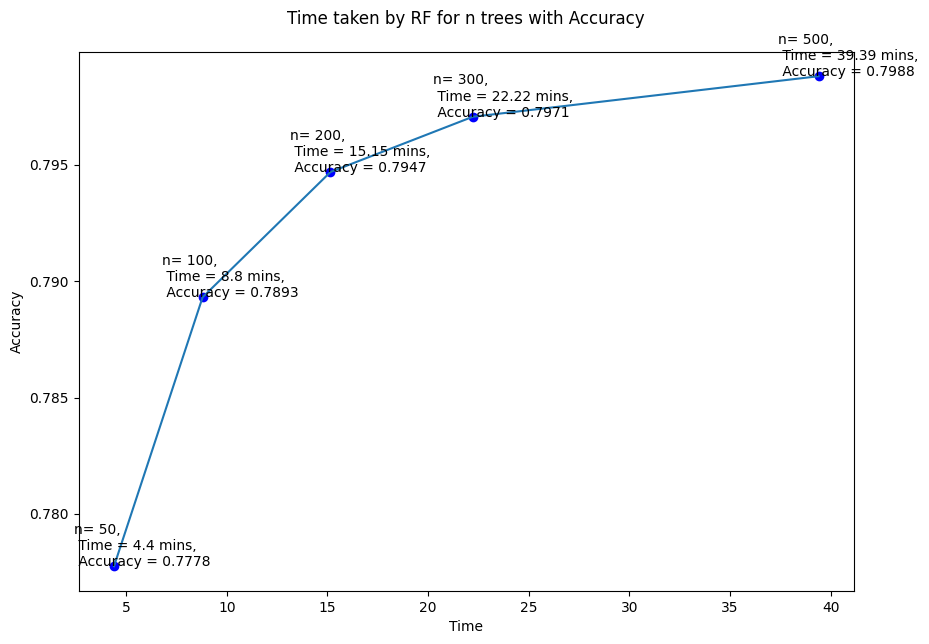

In [ ]:
# Plotting time and accuracy for all RF models
# Epochs vs Accuracy
#Vẽ biểu đồ 
%matplotlib inline
fig = plt.figure(figsize=(10,7))
ax = plt.axes()
ax.plot(time_rf_list,rf_accuracy,'bo')
ax.plot(time_rf_list,rf_accuracy)

ax.set_title('Time taken by RF for n trees with Accuracy',pad=20)
ax.set_xlabel('Time')  
ax.set_ylabel('Accuracy')

for x,y,i in zip(time_rf_list,rf_accuracy,tree_list):

    label = "n= {},\n Time = {} mins,\n Accuracy = {} ".format(i,round(x,4),round(y,4))
    ax.text(x-2,y,label, fontsize=10)
plt.show()  

In [ ]:
# Selecting best RF model
# chọn ra model tốt nhất (lấy từ độ chính xác, thời gian tiêu tốn)
rf_clf = RandomForestClassifier(n_estimators=300, random_state=121,criterion='entropy')
Y_pred_rf = Y_pred_list[3]
time_rf = time_rf_list[3]

acc_rf = rf_accuracy[3]
df_scores.loc[len(df_scores)] = ["RF","Accuracy",acc_rf]

df_model.loc[len(df_model)] = ["RF",acc_rf*100,time_rf]
acc_rf

0.797070467141726

In [ ]:
# Calculating recall, precision and f1 score for RF

recall_rf = metrics.recall_score(Y_test, Y_pred_rf, average='macro')
df_scores.loc[len(df_scores)] = ["RF", "Recall", recall_rf]

precision_rf = metrics.precision_score(Y_test, Y_pred_rf, average='macro')
df_scores.loc[len(df_scores)] = ["RF", "Precision", precision_rf]

f1_rf = metrics.f1_score(Y_test, Y_pred_rf, average='macro')
df_scores.loc[len(df_scores)] = ["RF", "F1", f1_rf]

In [ ]:
print("Classification report for RF classifier {0}:\n{1}\n".format(rf_clf, metrics.classification_report(Y_test, Y_pred_rf)))

Classification report for RF classifier RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=121):
              precision    recall  f1-score   support

           0       1.00      0.13      0.24        60
           1       0.69      0.87      0.77       720
           2       0.63      0.76      0.69       750
           3       0.63      0.71      0.66       450
           4       0.73      0.79      0.76       660
           5       0.62      0.64      0.63       630
           6       0.69      0.56      0.62       150
           7       0.71      0.76      0.74       450
           8       0.71      0.54      0.62       450
           9       0.93      0.86      0.90       480
          10       0.90      0.96      0.93       660
          11       0.86      0.96      0.90       420
          12       0.96      0.91      0.94       690
          13       0.98      0.99      0.98       720
          14       0.99      1.00      1.00       270
          15  

In [ ]:
cm = tf.math.confusion_matrix(Y_test, Y_pred_rf)

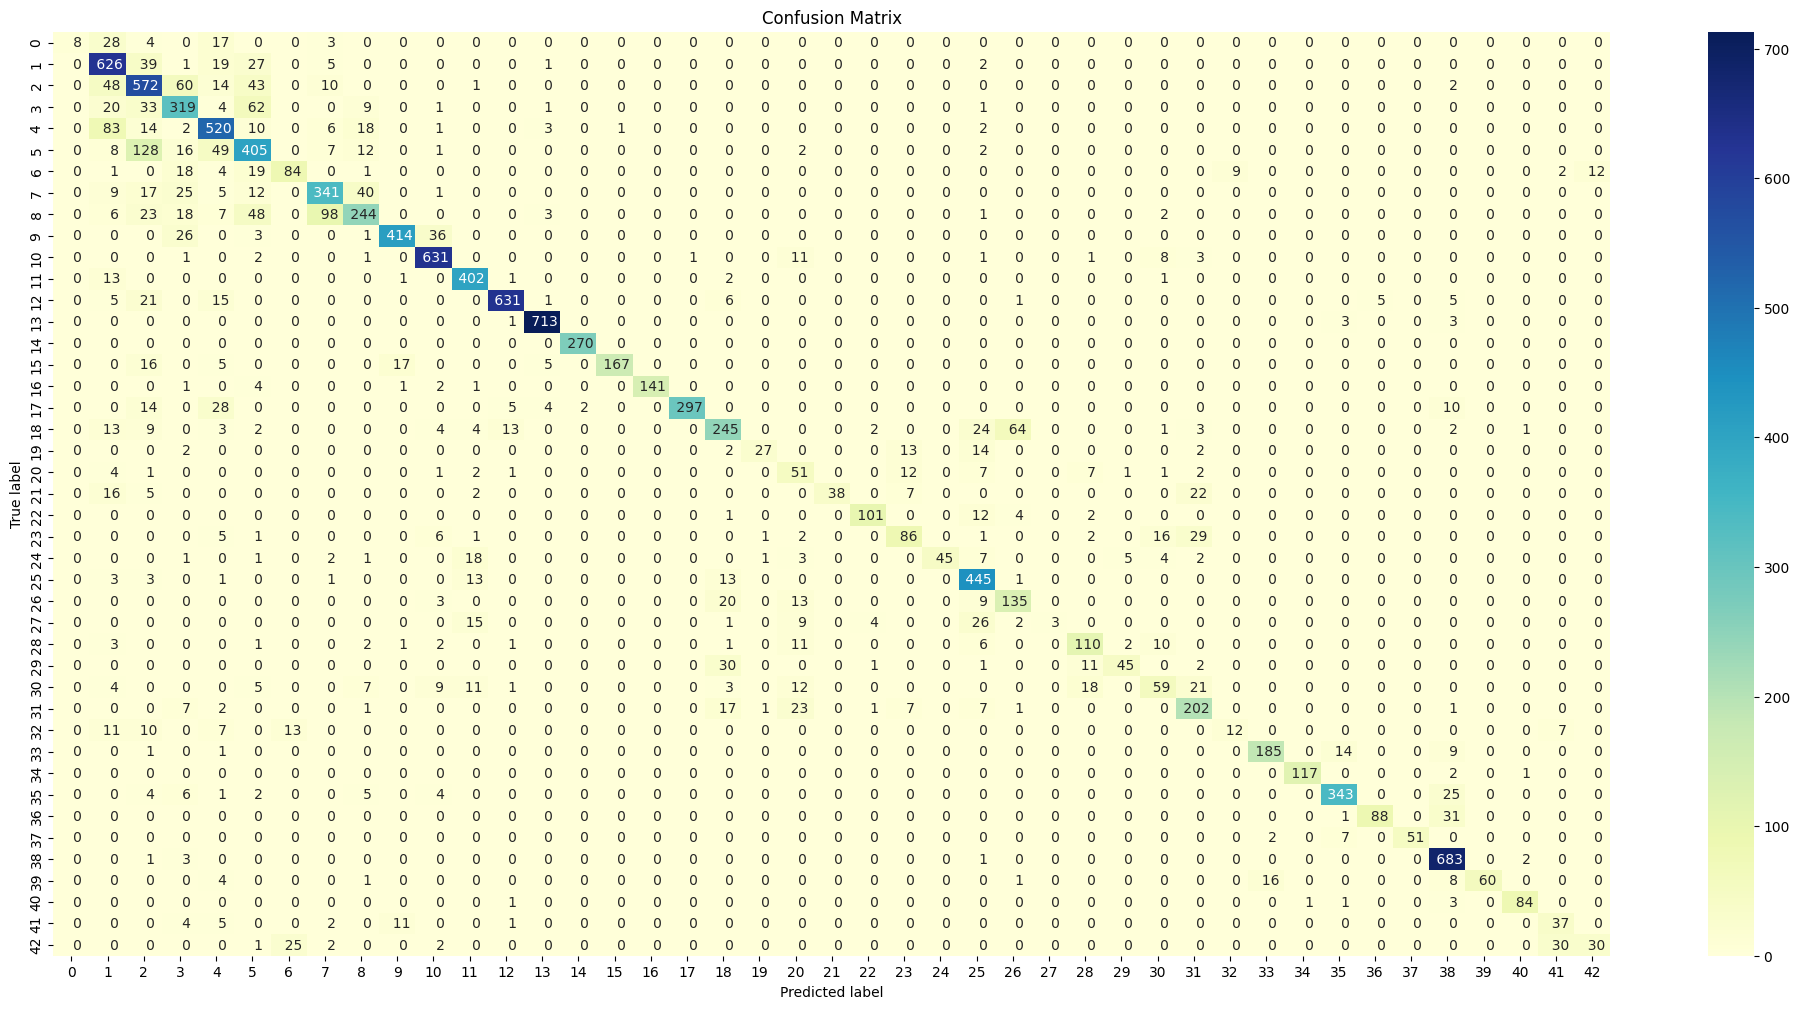

In [ ]:
plt.figure(figsize = (20, 10))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='4g')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### 6.4 Convolution Neural Network (CNN)

In [ ]:
# Defining CNN model
# CNN: vừa train vừa dự đoán
#Khởi tạo model cnn_clf tự tạo
cnn_clf = Sequential()
cnn_clf.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
cnn_clf.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
cnn_clf.add(MaxPool2D(pool_size=(2, 2)))
cnn_clf.add(Dropout(rate=0.25))
cnn_clf.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_clf.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_clf.add(MaxPool2D(pool_size=(2, 2)))
cnn_clf.add(Dropout(rate=0.25))
cnn_clf.add(Flatten())
cnn_clf.add(Dense(256, activation='relu'))
cnn_clf.add(Dropout(rate=0.5))
cnn_clf.add(Dense(43, activation='softmax'))

c:\Users\doanh\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


c:\Users\doanh\anaconda3\envs\myenv\lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


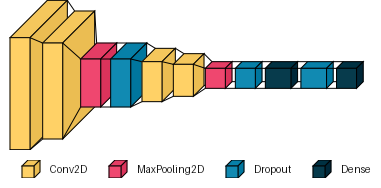

In [ ]:
visualkeras.layered_view(cnn_clf, type_ignore = [layers.Flatten], legend = True)

In [ ]:
#chia train_cnn thành 80 test
X_train_cnn, X_val_cnn, Y_train_cnn, Y_val_cnn = train_test_split(X_train, Y_train, test_size=0.2, random_state=121)
print(X_train_cnn.shape, X_val_cnn.shape, Y_train_cnn.shape, Y_val_cnn.shape)

(31367, 32, 32, 3) (7842, 32, 32, 3) (31367,) (7842,)


In [ ]:
Y_train_cnn

array([38,  2, 26, ..., 38, 10, 12])

In [ ]:
Y_train_cnn = to_categorical(Y_train_cnn, 43)
Y_val_cnn = to_categorical(Y_val_cnn, 43)

In [ ]:
# Compilation of the model
cnn_clf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fitting CNN
epochs = 15
history = cnn_clf.fit(X_train_cnn, Y_train_cnn, batch_size=32, epochs=epochs, validation_data=(X_val_cnn, Y_val_cnn))
toc = time.perf_counter()
m_cnn, s_cnn = divmod((toc - tic), 60)
time_cnn=float(str(str(int(m_cnn))+"."+str(int(m_cnn))))

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 66s 64ms/step - accuracy: 0.0683 - loss: 3.8743 - val_accuracy: 0.6613 - val_loss: 1.2495
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 78s 60ms/step - accuracy: 0.6257 - loss: 1.2748 - val_accuracy: 0.9014 - val_loss: 0.3671
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 56s 57ms/step - accuracy: 0.8001 - loss: 0.6762 - val_accuracy: 0.9439 - val_loss: 0.2227
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 67s 68ms/step - accuracy: 0.8571 - loss: 0.4727 - val_accuracy: 0.9568 - val_loss: 0.1617
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 90s 76ms/step - accuracy: 0.8854 - loss: 0.3774 - val_accuracy: 0.9647 - val_loss: 0.1161
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 64s 65ms/step - accuracy: 0.9043 - loss: 0.3218 - val_accuracy: 0.9690 - val_loss: 0.1246
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 63s 64ms/step - accuracy: 0.9053 - loss: 0.3199 - val_accuracy: 0.9705 - val_loss: 0.1033
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 80s 62ms/step - accuracy: 0.9158 - loss: 0.2890 - 

<Figure size 640x480 with 0 Axes>

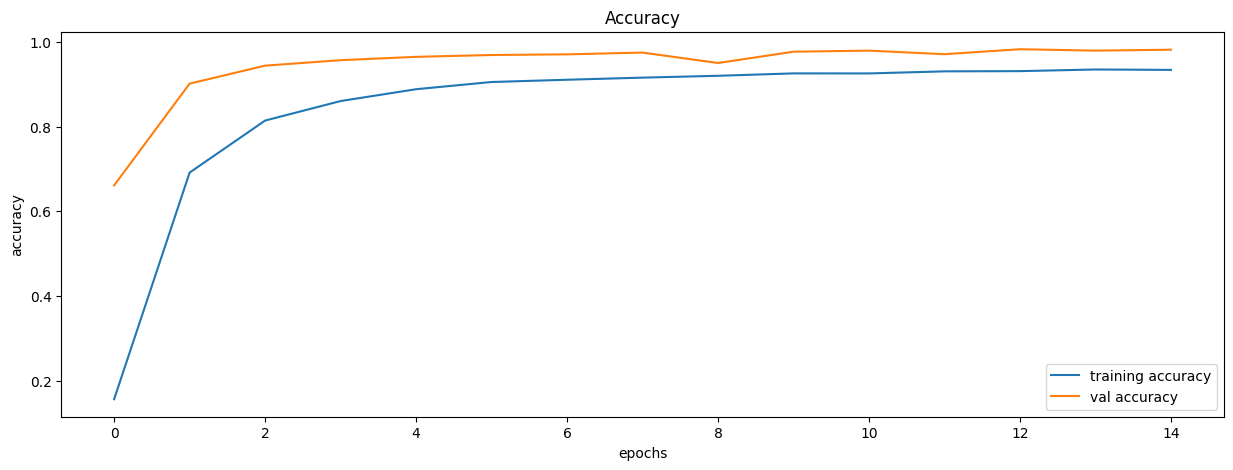

<Figure size 640x480 with 0 Axes>

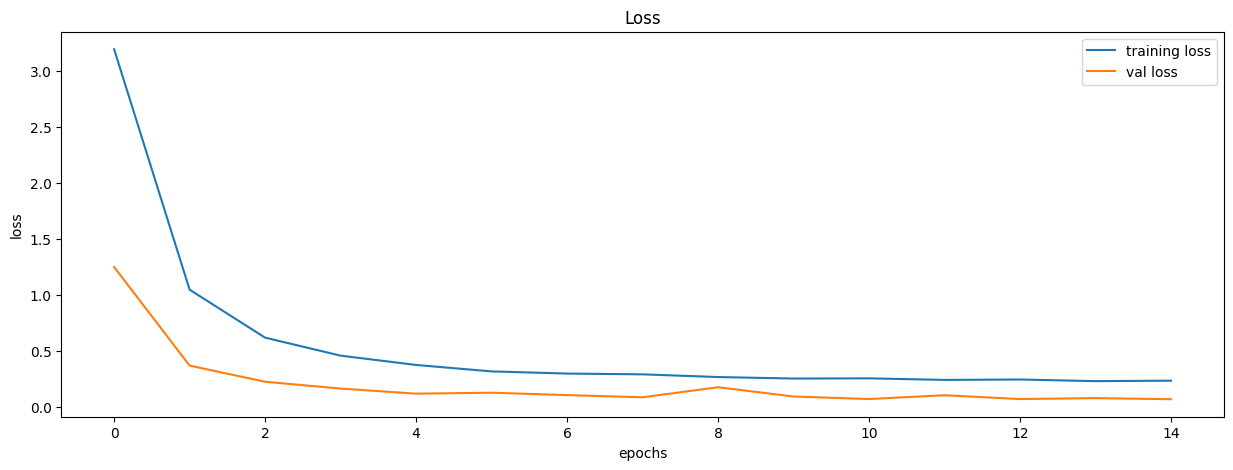

In [ ]:
plt.figure(0)
plt.figure(figsize = (15, 5))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.figure(figsize = (15, 5))
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# Predicting values for test data
Y_pred_cnn = cnn_clf.predict(X_test_cnn) 

395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step


In [ ]:
Y_pred_cnn

array([[7.6875367e-17, 3.6951243e-14, 3.0661435e-13, ..., 5.9355216e-12,
        6.4781464e-18, 7.5726731e-20],
       [3.9480395e-14, 1.0000000e+00, 1.1552326e-09, ..., 3.7789937e-20,
        8.6672752e-21, 3.6507077e-13],
       [0.0000000e+00, 8.5053928e-32, 1.3667042e-28, ..., 1.1061591e-25,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [4.5801121e-07, 1.2749001e-02, 9.2388219e-01, ..., 2.8734780e-06,
        2.6733389e-06, 7.6957540e-06],
       [3.2723793e-10, 7.2064216e-07, 4.9323444e-05, ..., 1.2629403e-06,
        6.6711415e-16, 3.8214341e-12],
       [4.6546738e-08, 4.3613687e-07, 2.3997370e-06, ..., 7.0560549e-07,
        3.3738352e-13, 6.3005628e-11]], dtype=float32)

In [ ]:
Y_test

array([16,  1, 38, ...,  6,  7, 10])

In [ ]:
Y_pred_cnn = np.argmax(Y_pred_cnn, axis=1)

In [ ]:
Y_pred_cnn

array([16,  1, 38, ...,  2,  7, 10])

In [ ]:
# Calculating and storing recall, precision, f1 score and accuracy of CNN
recall_cnn = metrics.recall_score(Y_test, Y_pred_cnn, average='macro')
df_scores.loc[len(df_scores)] = ["CNN", "Recall", recall_cnn]

precision_cnn = metrics.precision_score(Y_test, Y_pred_cnn, average='macro')
df_scores.loc[len(df_scores)] = ["CNN", "Precision", precision_cnn]

f1_cnn = metrics.f1_score(Y_test, Y_pred_cnn, average='macro')
df_scores.loc[len(df_scores)] = ["CNN", "F1", f1_cnn]

acc_cnn=metrics.accuracy_score(Y_test, Y_pred_cnn)
df_scores.loc[len(df_scores)] = ["CNN", "Accuracy", acc_cnn]

df_model.loc[len(df_model)] = ["CNN", acc_cnn*100, time_cnn]
acc_cnn

0.9330166270783848

In [ ]:
print("Classification report for CNN classifier {0}:\n{1}\n".format(cnn_clf, metrics.classification_report(Y_test, Y_pred_cnn)))

Classification report for CNN classifier <Sequential name=sequential, built=True>:
              precision    recall  f1-score   support

           0       1.00      0.38      0.55        60
           1       0.98      0.93      0.96       720
           2       0.93      0.97      0.95       750
           3       0.93      0.89      0.91       450
           4       0.91      0.97      0.94       660
           5       0.81      0.96      0.88       630
           6       0.92      0.83      0.87       150
           7       0.95      0.96      0.95       450
           8       0.91      0.89      0.90       450
           9       0.95      0.97      0.96       480
          10       0.95      0.98      0.96       660
          11       0.96      0.95      0.95       420
          12       0.99      0.94      0.96       690
          13       0.97      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       0.92      0.99      0.95       21

In [ ]:
cm = tf.math.confusion_matrix(Y_test, Y_pred_cnn)

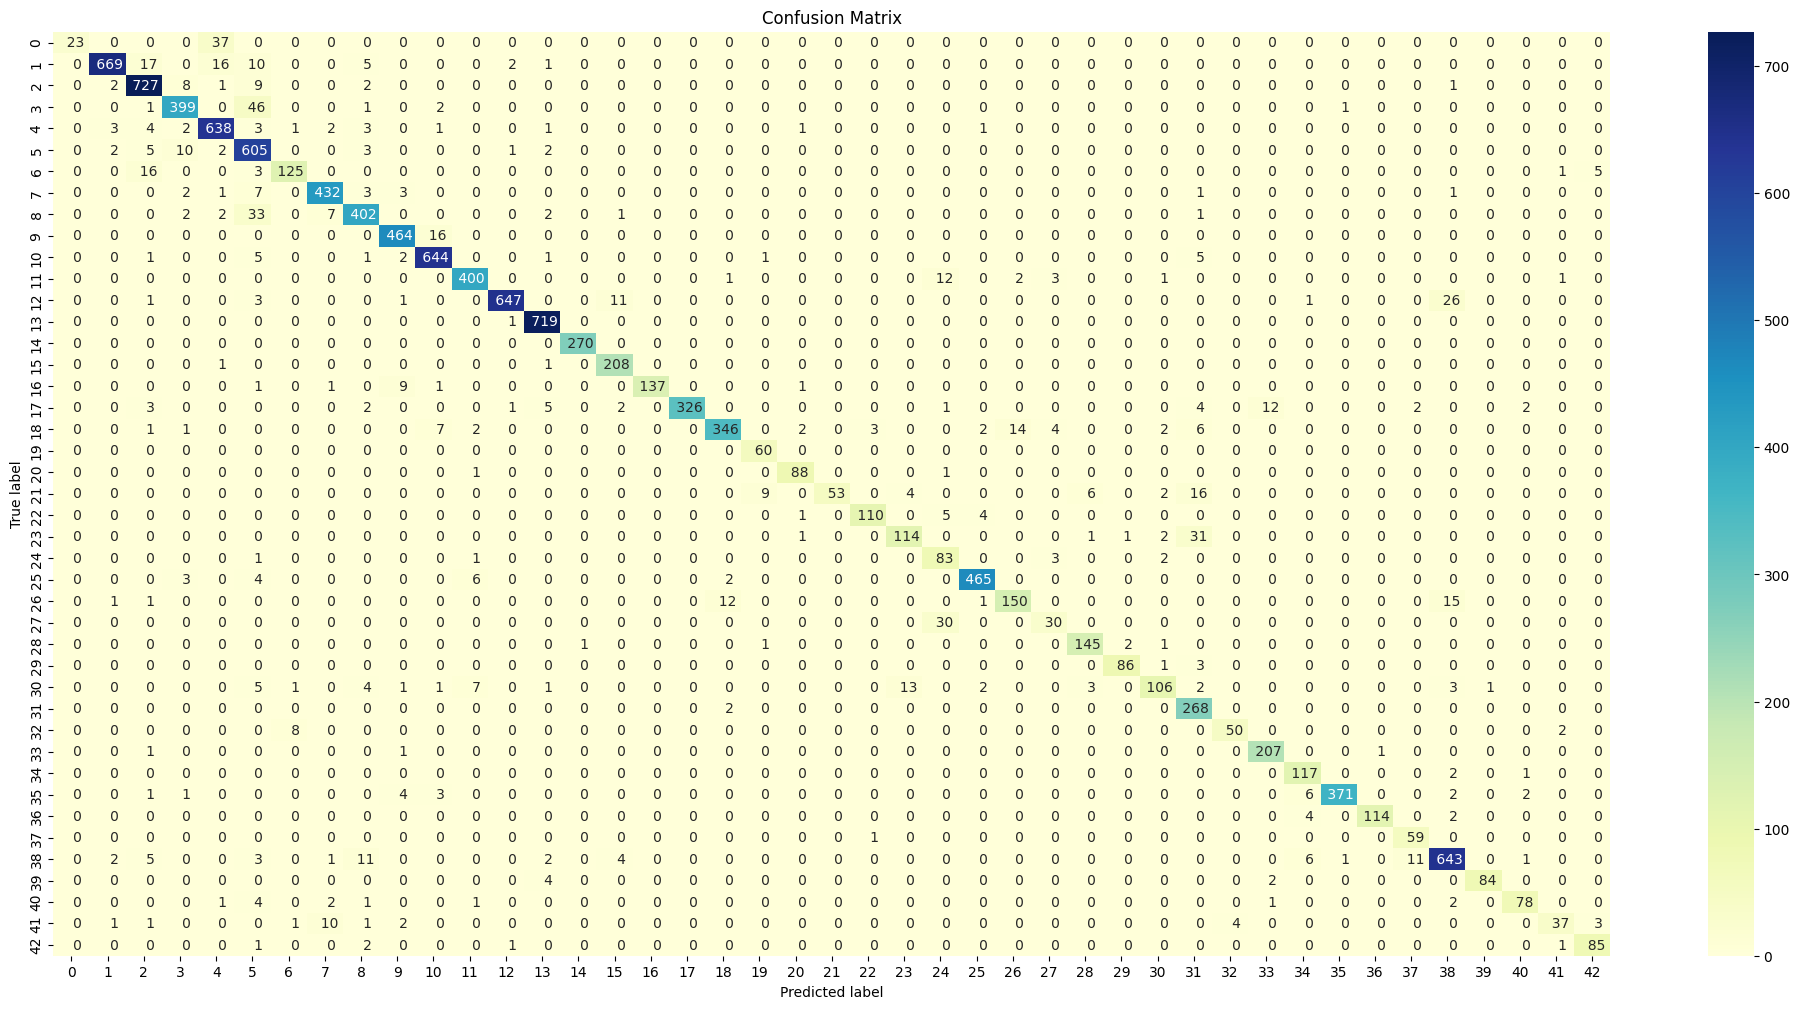

In [ ]:
plt.figure(figsize = (20, 10))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='4g')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

##XGBOX

In [ ]:
!pip install xgboost

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris  # ví dụ sử dụng Iris dataset

In [ ]:
# Load dataset ví dụ
data = load_iris()
X = data.data
y = data.target

# Tách dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train_xgb = np.copy(X_train)
X_test_xgb = np.copy(X_test)


In [ ]:
X_train_xgb.resize(39209, 32*32*3)
X_test_xgb.resize(12630, 32*32*3)

In [ ]:
scaler=MinMaxScaler((-1,1))
X_train_xgb = scaler.fit_transform(X_train_xgb)
X_test_xgb = scaler.fit_transform(X_test_xgb)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train_xgb = np.copy(X_train)
X_test_xgb = np.copy(X_test)

from xgboost import XGBClassifier
import time

tic = time.perf_counter()

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_xgb, Y_train)

toc = time.perf_counter()
m_xgb, s_xgb = divmod((toc - tic), 60)
time_xgb = float(f"{int(m_xgb)}.{int(s_xgb)}")

print(xgb_clf)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)


In [ ]:
Y_pred_xgb = xgb_clf.predict(X_test)

In [ ]:
Y_pred_xgb

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
Y_proba_xgb = xgb_clf.predict_proba(X_test_xgb)  # xác suất
Y_pred_xgb = np.argmax(Y_proba_xgb, axis=1)     # chọn lớp có xác suất cao nhất


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Khởi tạo DataFrame df_scores
df_scores = pd.DataFrame(columns=["Model", "Metric", "Score"])

# Khởi tạo DataFrame df_model
df_model = pd.DataFrame(columns=["Model", "Accuracy (%)", "Time (m.s)"])


In [ ]:
# Tính recall, precision, f1 score và accuracy của XGBoot
recall_xgb = recall_score(Y_test, Y_pred_xgb, average='macro')
df_scores.loc[len(df_scores)] = ["XGBoot", "Recall", recall_xgb]

precision_xgb = precision_score(Y_test, Y_pred_xgb, average='macro')
df_scores.loc[len(df_scores)] = ["XGBoot", "Precision", precision_xgb]

f1_xgb = f1_score(Y_test, Y_pred_xgb, average='macro')
df_scores.loc[len(df_scores)] = ["XGBoot", "F1", f1_xgb]

acc_xgb = accuracy_score(Y_test, Y_pred_xgb)
df_scores.loc[len(df_scores)] = ["XGBoot", "Accuracy", acc_xgb]

# Lưu kết quả vào df_model
df_model.loc[len(df_model)] = ["XGBoot", acc_xgb * 100, time_xgb]

acc_xgb

1.0

In [ ]:
! pip install graphviz


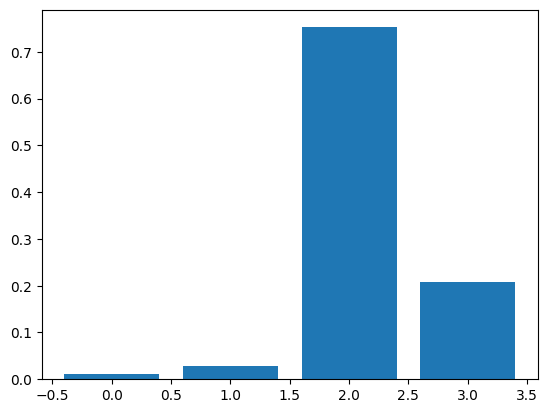

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
# Vẽ biểu đồ tầm quan trọng của tính năng thủ công
plt.bar(range(len(xgb_clf.feature_importances_)), xgb_clf.feature_importances_)
plt.show()

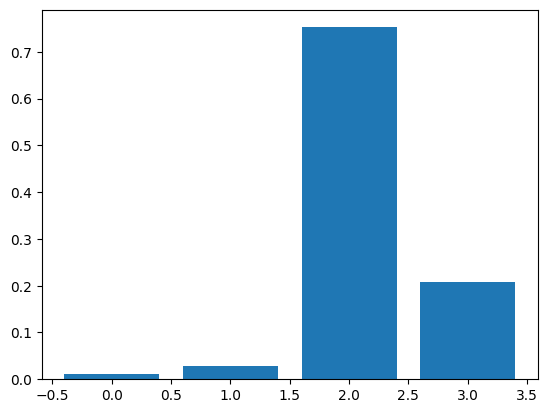

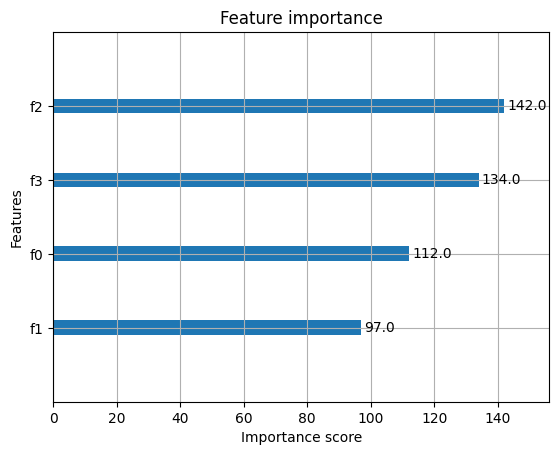

In [ ]:
# Vẽ tầm quan trọng bằng hàm có sẵn
plot_importance(xgb_clf)
plt.show()


In [ ]:
# Classification report for XGBoot
print("Classification report for XGBoot classifier {0}:\n{1}\n".format(xgb_clf, metrics.classification_report(Y_test, Y_pred_xgb)))

Classification report for XGBoot classifier XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.

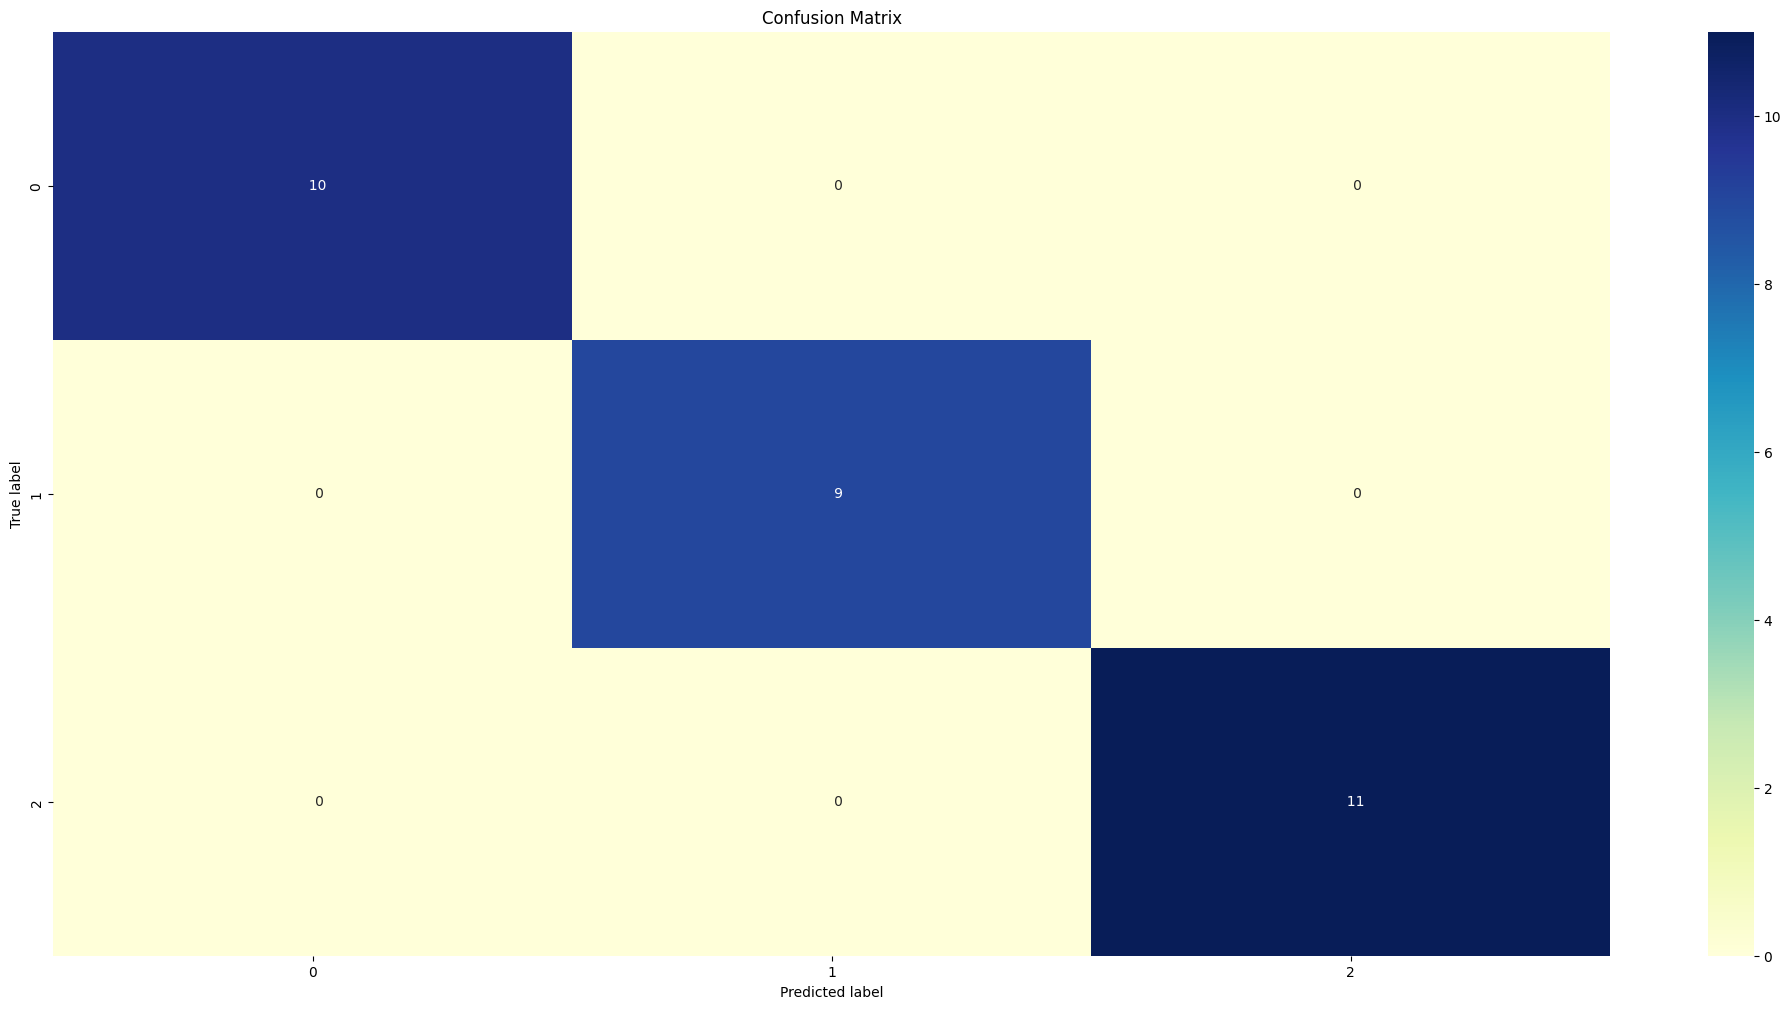

In [ ]:
cm = tf.math.confusion_matrix(Y_test, Y_pred_xgb)
plt.figure(figsize = (20, 10))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='4g')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#7. Summary

In [ ]:
df_model

,Model,Accuracy (%),Time (m.s)
0,XGBoot,100.0,0.1


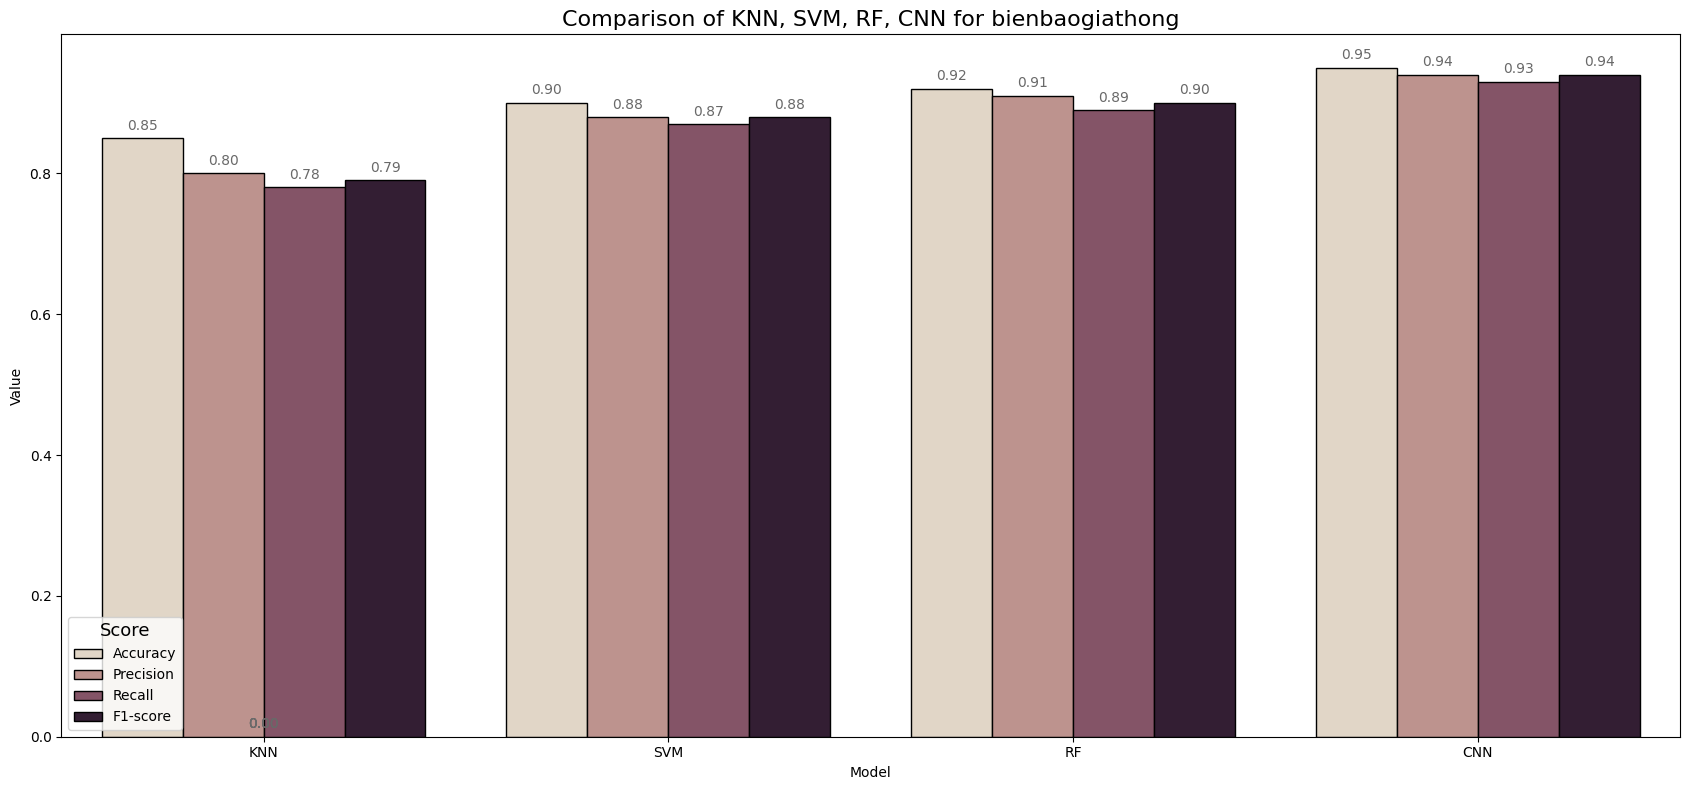

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo DataFrame mẫu
data = {
    'Model': ['KNN', 'KNN', 'KNN', 'KNN', 'SVM', 'SVM', 'SVM', 'SVM', 'RF', 'RF', 'RF', 'RF', 'CNN', 'CNN', 'CNN', 'CNN'],
    'Score': ['Accuracy', 'Precision', 'Recall', 'F1-score']*4,
    'Value': [0.85, 0.80, 0.78, 0.79, 0.90, 0.88, 0.87, 0.88, 0.92, 0.91, 0.89, 0.90, 0.95, 0.94, 0.93, 0.94]
}
df_scores_melted = pd.DataFrame(data)

# Chuyển Model và Score thành str
df_scores_melted['Model'] = df_scores_melted['Model'].astype(str)
df_scores_melted['Score'] = df_scores_melted['Score'].astype(str)

# Vẽ
fig, ax = plt.subplots(figsize=(17,8))
sns.barplot(x="Model", y="Value", hue="Score", data=df_scores_melted, palette="ch:.25", edgecolor="black", ax=ax)
ax.set_title('Comparison of KNN, SVM, RF, CNN for bienbaogiathong', fontsize=16)

# Thêm số lên đầu cột
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10, color='dimgrey')

plt.legend(title='Score', title_fontsize='13')
plt.tight_layout()
plt.show()


# 7. Lưu Model

In [ ]:
cnn_clf.save('bienbaogiaothong.h5')

#9. Demo


In [ ]:
load_model = tf.keras.models.load_model('bienbaogiaothong.h5')